In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pwd

'C:\\Users\\ABC'

In [3]:
df = pd.read_csv('C:\\Users\\ABC\\6. Datasets\\BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df = df[['lstat', 'medv']]
df.shape

(506, 2)

In [6]:
from sklearn.cluster import KMeans

In [7]:
km = KMeans()

In [8]:
sse = []
for k in range(1,15):
    km = KMeans(n_clusters=k)
    km.fit_predict(df)
    sse.append(km.inertia_)
sse

C:\Users\ABC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[68468.648966996,
 33002.73172796764,
 16696.480272646404,
 11695.827374824676,
 8101.153579250989,
 6464.426349712216,
 5693.747104187838,
 5032.711029866121,
 4506.860025538254,
 4186.197588897965,
 3668.136563190983,
 3363.20836926226,
 3097.751520803487,
 2864.6312158932933]

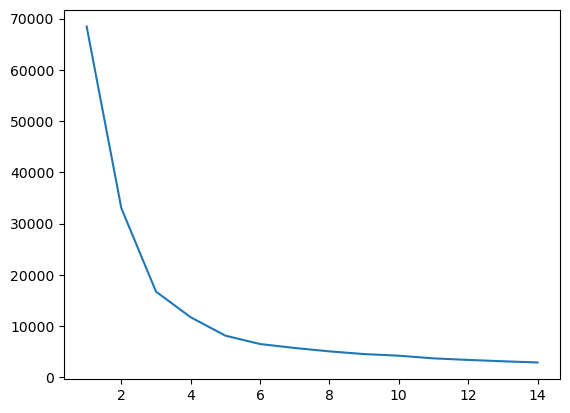

In [9]:
plt.plot(range(1,15), sse)

In [10]:
df

,lstat,medv
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2
...,...,...
501,9.67,22.4
502,9.08,20.6
503,5.64,23.9
504,6.48,22.0


In [11]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df)
df['clusters'] = y_pred
df.head()

,lstat,medv,clusters
0,4.98,24.0,1
1,9.14,21.6,1
2,4.03,34.7,2
3,2.94,33.4,2
4,5.33,36.2,2


In [26]:
df1 = df[df['clusters'] == 0]
df2 = df[df['clusters'] == 1]
df3 = df[df['clusters'] == 2]

In [27]:
km.cluster_centers_

array([[21.93746377, 13.5173913 ],
       [10.39878049, 22.19512195],
       [ 4.82259259, 39.08888889]])

In [28]:
a = km.cluster_centers_[:,0]
b = km.cluster_centers_[:,1]

Text(0.5, 1.0, 'K_Means for House prices')

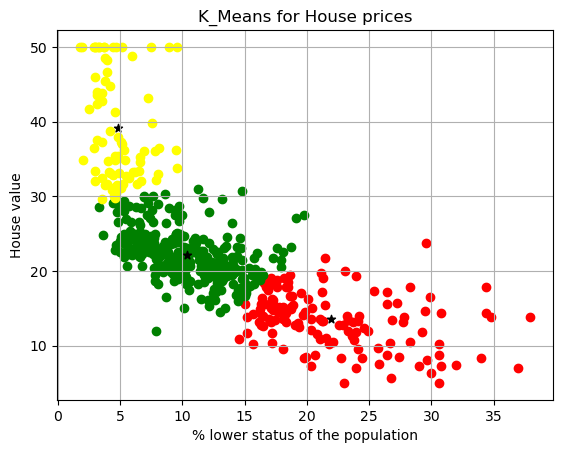

In [32]:
plt.scatter(df1['lstat'], df1['medv'], color = 'red')
plt.scatter(df2['lstat'], df2['medv'], color = 'green')
plt.scatter(df3['lstat'], df3['medv'], color = 'yellow')
plt.scatter(a,b, marker = "*", color = 'black')
plt.grid()
plt.xlabel('% lower status of the population')
plt.ylabel('House value')
plt.title('K_Means for House prices')